# Integración analítica con SymPy. Centros de gravedad y centroides

## Mecánica para Ingenieros. Grado en Ingeniería Civil. 

+ Alejandro E. Martínez Castro (Desarrollador principal, email:amcastro@ugr.es).
+ Rafael Muñoz Beltrán.
+ Germán Rodríguez Salido.
+ Gracia Rodríguez Jerónimo.
+ Juan José Granados Romera.

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">licencia de Creative Commons Reconocimiento-NoComercial 4.0 Internacional</a>.

# Objetivos de este cuaderno

- Uso de SymPy para obtener integrales analíticas.  
- Evaluación numérica de una expresión simbólica. 
- Exportar una expresión simbólica a código Python.

# El paquete SymPy para análisis simbólico. 

En el cuaderno 2 ya se hizo alusión a este interesante paquete de Python. Frente a otros sistemas CAS comerciales (como Mathemática), SymPy permite realizar de forma sencilla operaciones simbólicas. 

En primer lugar, cargaremos el paquete SymPy

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## Problema: determinación del centroide de un semicírculo

Para motivar el uso de SymPy, se va a resolver el problema 4 de la relación de problemas, cuyo enunciado es el siguiente: "Determine la posición del centroide de un semicírculo de radio R". 

Consideremos la siguiente figura, en la cual se ha indicado un sistema de referencia $x,y$ con origen en el centro del semicírculo. 



<IMG SRC="cuad3_fig1.png" WIDTH=400 HEIGHT=180 BORDER=2 ALT="Semicirculo">


Para determinar el centroide, únicamente es necesario determinar la coordenada $y_G$, puesto que por simetría, $x_G = 0$, considerando el sistema de referencia de la figura. Por tanto:

\begin{equation}
y_G = \dfrac{\int \int_{S} y \, d S} {\int \int_{S} d S}
\end{equation}

Teniendo el cuenta las coordenadas polares $(r,\theta)$, 
- $y(r,\theta) = r\,\mathrm{sen}\theta$
- $dS = r\,d\theta\,dr$

En primer lugar, hemos de decirle a SymPy qué parámetros vamos a considerar como símbolos. 

In [2]:
R, r, theta = symbols('R,r,theta') # Le decimos a Python que son símbolos. Al indicar 'theta' aparecerá la letra griega

A continuación, indicaremos que y(r) es una función de r, $y(r) = r\,\mathrm{sen}\theta$

In [3]:
y = r * sin (theta)
y

Para definir el momento estático (numerador), basta con tener en cuenta que debemos definir una función, que depende sólo de las variables $r,\theta$, y que no es necesario indicar expresamente $dr,d\theta$. En el numerador aparece el producto de la función $y(r,\theta)$, por $r\,dr\,d\theta = dS$. 

La función para interar en SymPy neceita definir entre paréntesis: 
- La función a integrar (omitiendo los términos $ds$, $dr$. En nuestro caso será $y(r,\theta)\cdot r$
- Los límites de variación de cada parámetro. En nuestro caso, $r$ varía en $[0,R]$ y $\theta$ en $[0,\frac{\pi}{2}]$

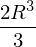

In [4]:
momento_estatico = integrate(y * r,(r,0,R),(theta,0,pi))
momento_estatico

De forma análoga, procederemos con el área, la cual se obtiene por integración de $dS = r\,dr\,d\theta$. Puesto que no hemos de indicar de forma expresa los términos en $dr,d\theta$, tendremos que integrar como sigue: 

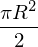

In [5]:
area = integrate(r,(r,0,R),(theta,0,pi))
area

Finalmente, procederemos, según la definición de $y_G$, a definir el cociente

In [6]:
yg = momento_estatico / area
yg

Observe que el resultado obtenido para $y_G = \dfrac{4 R}{3 \pi}$ coincide con el obtenido en la relación de problemas.

## Exportación de expresiones a código Python

Un problema habitual cuando se realiza un programa es tener que escribir fórmulas. En muchas ocasiones, las fórmulas proceden de un cálculo simbólico. 

Dentro de Python, es posible escribir un programa, y guardarlo en un fichero con extensión .py (típicos ficheros de Python que se abren en Spyder). 

Imaginemos que deseamos crear una función para evaluar `yg`. Necesitamos tener escrito en código Python el valor de yg anteriormente obtenido. 

Para esto, la función `print()` permite exportar una expresion simbólica a código Python. 

Observe la siguiente salida:

In [7]:
print(yg)

4*R/(3*pi)


Se ha obtenido `4*R/(3*pi)`, que es la sintaxis de Python. De la anterior expresión, quedaría por definir claramente la variable `pi`. Podría hacerse cargando la librería Numpy, con `np.pi()`. 

Existen otros formatos de exportación. Por ejemplo, puede obtenerse la salida a código LaTeX, como sigue:

In [8]:
print(latex(yg))

\frac{4 R}{3 \pi}


## Evaluación para unos valores dados

Una vez obtenida una expresión en simbólico, es posible que estemos interesados en particularizar el resultado para unos valores dados. Para esto, SymPy tiene una función de evaluación. 

Consideremos que deseamos evaluar el centro de gravedad, para un semicírculo de radio $R = 14$. 

Puesto que la variable $R$ ya está asignada como simbólica, vamos a definir otra variable, para almacenar el dato concreto del radio que se desea evaluar. Denominaremos a esta nueva variable $R_{eval}$

In [9]:
R_eval = 14

A continuación, podremos evaluar el valor concreto de $y_G$ para $R = R_{eval}$

In [10]:
y_centro = yg.subs([(R,R_eval)])
y_centro

Nótese que aún no se ha obtenido un número con decimales, ya que la función 'subs' ha actuado sobre el objeto 'yg' sustituyendo en simbólico, el símbolo $R$ por su valor contenido en la variable $R_1$. 

Para obtener una aproximación decimal, es necesario evaluar la expresión anterior. Para esto, utilizaremos la función ´evalf()'.

In [11]:
y_centro.evalf()

## Centro de gravedad. Densidad variable con el radio

En esta ocasión vamos a determinar la posición del centro de gravedad de un semicírculo de radio $R$. Consideraremos que la densidad (masa/superficie) no es una función constante, sino que varía, según la siguiente expresión: 

$$\rho(r) = \rho_1 + \dfrac{\rho_2}{R}\,r$$

Es decir, la densidad varía de forma lineal con el radio. Para $r=0$ el valor de la densidad es $\rho_1$ y para $r=R$ la densidad vale $\rho_2$. La expresión anterior permite obtener la densidad para cualquier valor de $r\in[0,R]$. 

Por simetría (atención, también $\rho(r)$ induce simetría, sólo debemos obtener el valor de $y_G$, como sigue: 

\begin{equation}
y_{CG} = \dfrac{\int \int_{S} \rho\, y \, d S} {\int \int_{S} \rho\, d S}
\end{equation}

In [12]:
rho, rho1, rho2 = symbols('rho,rho_1,rho_2')

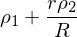

In [13]:
rho = rho1 + rho2/R * r
rho

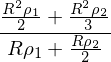

In [14]:
y_CG = integrate(rho*r,(r,0,R),(theta,0,pi)) / integrate(rho,(r,0,R),(theta,0,pi))
y_CG

Podemos simplificar la expresión anterior, mediante la función `simplify()`, actuando sobre el objeto anterior

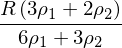

In [15]:
y_CG.simplify()

## Sector semicircular

Determine la posición $y_G$ del sector semicircular de la figura (radios $R1$ y $R2$), considerando densidad constante. Evalúe el resultado para $R1 = 8.3$, $R2 = 15.2$

<IMG SRC="cuad3_fig2.png" WIDTH=400 HEIGHT=180 BORDER=2 ALT="Semicirculo">

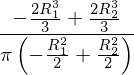

In [16]:
R1, R2 = symbols('R1,R2')
yg = integrate(y*r,(r,R1,R2),(theta,0,pi)) / integrate(r,(r,R1,R2),(theta,0,pi))
yg

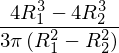

In [17]:
yg.simplify()

In [18]:
yg.subs([(R1,8.3),(R2,15.2)]).evalf()

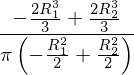

In [19]:
yg

Determinación de la expresión en código Python para `yg`

In [20]:
print(yg)

(-2*R1**3/3 + 2*R2**3/3)/(pi*(-R1**2/2 + R2**2/2))
